In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\user\\Datasets\\knn_data.csv")

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA
Since this data is dummy , we'll just do a large pairplot with seaborn

Use seaborn on the dataframe to create a pairplot with hue indicated by the taraget class column.

In [5]:
#sns.pairplot(df,hue='TARGET CLASS')

# Standardize the variables 

In [6]:
from sklearn.preprocessing import StandardScaler
myscaler=StandardScaler()

In [7]:
myscaler.fit(X=df.drop('TARGET CLASS',axis=1))
X=myscaler.transform(X=df.drop('TARGET CLASS',axis=1))

In [8]:
tdf = pd.DataFrame(X , columns = df.columns[:-1])
tdf.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [24]:
from sklearn.model_selection import train_test_split
y=df['TARGET CLASS']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
myKNN=KNeighborsClassifier(n_neighbors=1)
myKNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evalutions
use the predict method to predict values using your KNN model and X_test


In [26]:
y_predict=myKNN.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_predict))

[[109  43]
 [ 41 107]]


In [28]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Chossing a K Value
Let's go ahead and use the elbow method to pick a good K value!
Create a for loop that trains various K Nearest Neibhours models with different k values, then keep track of the error_rate for each of these models with a llist.1

In [29]:
err_rates=[]
for idx in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=idx)
    knn.fit(X_train,y_train)
    pred_idx=knn.predict(X_test)
    err_rates.append(np.mean(y_test != pred_idx))
    
err_rates

[0.28,
 0.29,
 0.21666666666666667,
 0.22,
 0.20666666666666667,
 0.21,
 0.18333333333333332,
 0.19,
 0.19,
 0.17666666666666667,
 0.18333333333333332,
 0.18333333333333332,
 0.18333333333333332,
 0.18,
 0.18,
 0.18,
 0.17,
 0.17333333333333334,
 0.17666666666666667,
 0.18333333333333332,
 0.17666666666666667,
 0.18333333333333332,
 0.16666666666666666,
 0.18,
 0.16666666666666666,
 0.17,
 0.16666666666666666,
 0.17333333333333334,
 0.16666666666666666,
 0.17333333333333334,
 0.16,
 0.16666666666666666,
 0.17333333333333334,
 0.17333333333333334,
 0.17,
 0.16666666666666666,
 0.16,
 0.16333333333333333,
 0.16]

# Now create the following plot using the information from your for loop. 

Text(0.5, 1.0, 'Error Rate vs K-value')

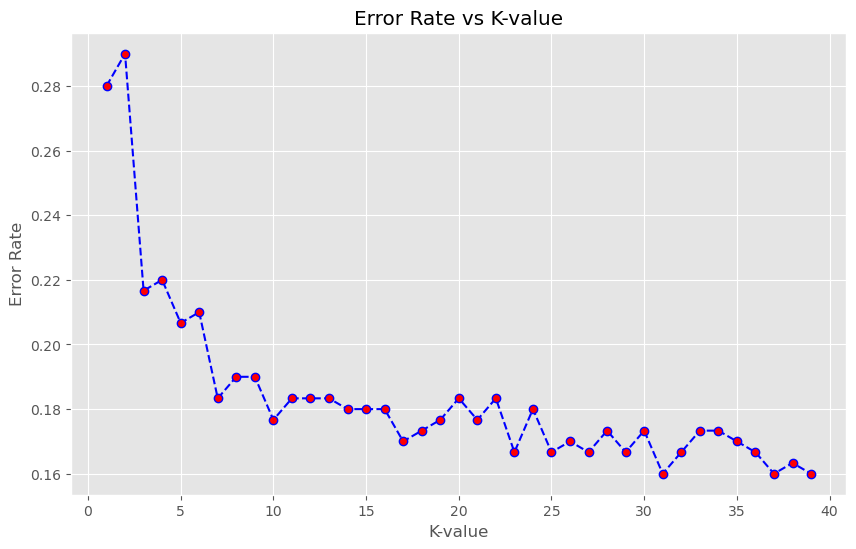

In [30]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,6))
plt.plot(range(1,40),err_rates,linestyle='dashed',color='blue',marker='o',markerfacecolor='red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

# Retrain with new K Value
Retrain your model with the best K value (up to you to decide what you want) and re-do the classfication report and the confusion matrix.

In [31]:
myKNN=KNeighborsClassifier(n_neighbors=31)
myKNN.fit(X_train,y_train)
y_predict=myKNN.predict(X_test)

print('WITH K=31')
print('')
print(confusion_matrix(y_test,y_predict))
print('')
print(classification_report(y_test,y_predict))

WITH K=31

[[123  29]
 [ 19 129]]

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

